In [2]:
import pandas as pd
import time

fileName = "Northern Branch Phase II Debris Removal Ops.xlsx" # insert your file name here
df = pd.read_excel(fileName)

# TODO: variable for crews needed and property status
# our variables
status = ("Withdrawal", "Ineligible") # will use to take those properties out

todaysDate = time.strftime("%m-%d-%y")

def mean_crew_days_on_property(df):
    # filter out withdrawals and ineligible properties and dates needed
    df = df.copy()
    start_date = input("Put your start day in this format year-month-day (2021-05-01): ")
    end_day = input("Put your end day in this format year-month-day (2021-06-19): ")
    
     
    
    df.loc[:, ['Debris Start', 'Debris Finish']] = df[(df.loc[:, 'Debris Start'] >= start_date) & 
                                                      (df.loc[:, 'Debris Finish'] <= end_day)]
    df.loc[:,  "Structural Status"] = (~df.loc[:, "Structural Status"].isin(status))

    # AVG Days on Site from - finish day minus start day
    df.loc[:, "AVG Days on Site from: " + start_date + " to " + end_day] = df.loc[:, 'Debris Finish'] - df.loc[:, 'Debris Start']

    # convert 'AVG Days on Site from' column to a float instead of timedelta64[ns]
    df["AVG Days on Site from: " + start_date + " to " + end_day] = df["AVG Days on Site from: " + start_date + " to " + end_day].dt.days

    # Filter columns we need
    df = df[['APN', "Structural Status", 'County', 'Debris Crew', 'Debris Crew WO#', 'Debris Start',
             'Debris Finish', "AVG Days on Site from: " + start_date + " to " + end_day]]

    # RE for filtering out the crew numbers from the rest of the text. Only way to get crews by group on this project(Northern Branch)
    df['Debris Crew WO#'] = df['Debris Crew WO#'].str.extract('(CREW ?# ?\d+)')

    # take out the spaces in 'Debris Crew WO#'
    df['Debris Crew WO#'] = df['Debris Crew WO#'].str.replace(" ", "")

    dffilt = df[['County', 'Debris Crew WO#', "AVG Days on Site from: " + start_date + " to " + end_day]]\
        .groupby(['County', 'Debris Crew WO#']).mean().round(2).fillna(0)
    
    dffilt.to_excel("Mean days on property " + todaysDate + ".xlsx")

    return df[['County', 'Debris Crew WO#', "AVG Days on Site from: " + start_date + " to " + end_day]]\
        .groupby(['County', 'Debris Crew WO#']).mean().round(2).fillna(0)




C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
meanDaysOnSite = mean_crew_days_on_property(df)

Put your start day in this format year-month-day (2021-05-01): 2021-05-01
Put your end day in this format year-month-day (2021-06-19): 2021-06-19


<AxesSubplot:xlabel='County,Debris Crew WO#'>

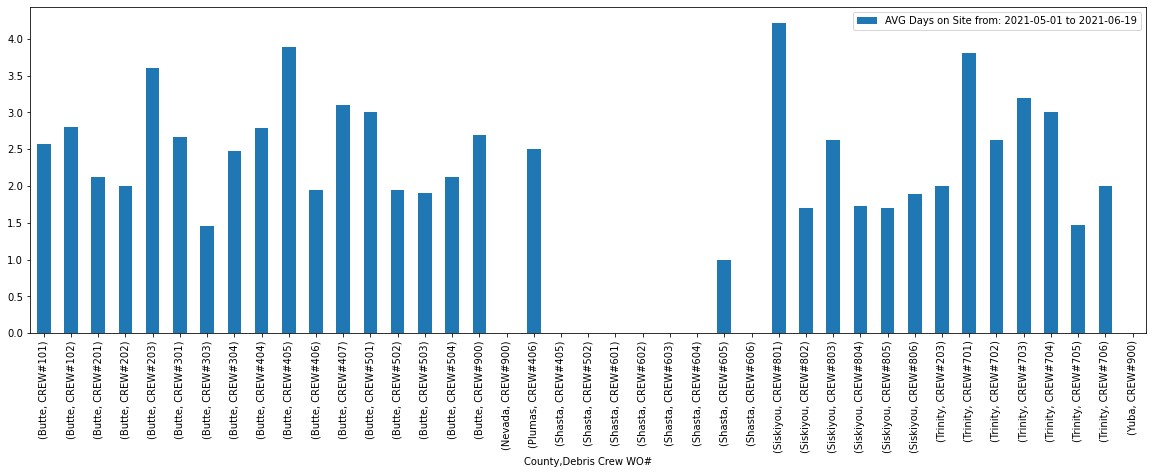

In [15]:
meanDaysOnSite.plot(kind='bar', figsize=(20,6))

In [6]:
meanDaysOnSite

AVG Days on Site from: 2021-05-01 to 2021-06-19
County   Debris Crew WO#                                                 
Butte    CREW#101                                                    2.57
         CREW#102                                                    2.80
         CREW#201                                                    2.12
         CREW#202                                                    2.00
         CREW#203                                                    3.60
         CREW#301                                                    2.67
         CREW#303                                                    1.45
         CREW#304                                                    2.47
         CREW#404                                                    2.79
         CREW#405                                                    3.89
         CREW#406                                                    1.94
         CREW#407                                                    3.10
         CREW#501                                                    3.00
         CREW#502                                                    1.94
         CREW#503                                                    1.90
         CREW#504                                                    2.12
         CREW#900                                                    2.69
Nevada   CREW#900                                                    0.00
Plumas   CREW#406                                                    2.50
Shasta   CREW#405                                                    0.00
         CREW#502                                                    0.00
         CREW#601                                                    0.00
         CREW#602                                                    0.00
         CREW#603                                                    0.00
         CREW#604                                                    0.00
         CREW#605                                                    1.00
         CREW#606                                                    0.00
Siskiyou CREW#801                                                    4.22
         CREW#802                                                    1.70
         CREW#803                                                    2.62
         CREW#804                                                    1.73
         CREW#805                                                    1.70
         CREW#806                                                    1.89
Trinity  CREW#203                                                    2.00
         CREW#701                                                    3.80
         CREW#702                                                    2.62
         CREW#703                                                    3.20
         CREW#704                                                    3.00
         CREW#705                                                    1.47
         CREW#706                                                    2.00
Yuba     CREW#900                                                    0.00